<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-data" data-toc-modified-id="load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load data</a></span></li><li><span><a href="#제목,-본문-추출" data-toc-modified-id="제목,-본문-추출-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>제목, 본문 추출</a></span><ul class="toc-item"><li><span><a href="#전처리" data-toc-modified-id="전처리-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>전처리</a></span><ul class="toc-item"><li><span><a href="#기자명,-이메일,-소문자-알파벳-제거" data-toc-modified-id="기자명,-이메일,-소문자-알파벳-제거-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>기자명, 이메일, 소문자 알파벳 제거</a></span></li><li><span><a href="#20문단이-넘는-기사-제거" data-toc-modified-id="20문단이-넘는-기사-제거-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>20문단이 넘는 기사 제거</a></span></li></ul></li></ul></li><li><span><a href="#head-전처리" data-toc-modified-id="head-전처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>head 전처리</a></span></li><li><span><a href="#head로-주제-분류" data-toc-modified-id="head로-주제-분류-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>head로 주제 분류</a></span><ul class="toc-item"><li><span><a href="#단어-추출" data-toc-modified-id="단어-추출-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>단어 추출</a></span></li><li><span><a href="#tf-idf" data-toc-modified-id="tf-idf-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>tf idf</a></span></li><li><span><a href="#문서-번호는-다르지만-유사도가-1인-문서쌍" data-toc-modified-id="문서-번호는-다르지만-유사도가-1인-문서쌍-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>문서 번호는 다르지만 유사도가 1인 문서쌍</a></span></li></ul></li><li><span><a href="#본문으로-주제-분류" data-toc-modified-id="본문으로-주제-분류-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>본문으로 주제 분류</a></span><ul class="toc-item"><li><span><a href="#본문-추출" data-toc-modified-id="본문-추출-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>본문 추출</a></span></li><li><span><a href="#본문-전처리-\n-포함" data-toc-modified-id="본문-전처리-\n-포함-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>본문 전처리 \n 포함</a></span></li><li><span><a href="#단어-추출" data-toc-modified-id="단어-추출-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>단어 추출</a></span></li><li><span><a href="#tf-idf" data-toc-modified-id="tf-idf-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>tf idf</a></span></li><li><span><a href="#문서-번호는-다르지만-유사도가-1인-문서쌍" data-toc-modified-id="문서-번호는-다르지만-유사도가-1인-문서쌍-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>문서 번호는 다르지만 유사도가 1인 문서쌍</a></span></li><li><span><a href="#tfidf-vector-의-문서-한개당-0의-비율-확인" data-toc-modified-id="tfidf-vector-의-문서-한개당-0의-비율-확인-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>tfidf vector 의 문서 한개당 0의 비율 확인</a></span></li><li><span><a href="#유사도가-1이지만-내용이-다른-문서의-tfidf-vector-값-확인" data-toc-modified-id="유사도가-1이지만-내용이-다른-문서의-tfidf-vector-값-확인-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>유사도가 1이지만 내용이 다른 문서의 tfidf vector 값 확인</a></span></li><li><span><a href="#df-max-를-설정하지-않고-벡터화" data-toc-modified-id="df-max-를-설정하지-않고-벡터화-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>df max 를 설정하지 않고 벡터화</a></span></li></ul></li></ul></div>

In [1083]:
import numpy as np

# file I/O
import pandas as pd
import pickle

# preprocessing
import datetime

# visualization
import matplotlib.pyplot as plt
import seaborn as sb
import umap.umap_ as umap 

# nlp
import re
import konlpy
import nltk
from konlpy.tag import Hannanum

# topic modeling
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
import gensim
from gensim.models import Word2Vec

from sklearn.metrics import pairwise_distances
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

## load data

In [2]:
# load pickle
with open('data/rawdata_손흥민.pickle','rb') as f:
    obj_json = pickle.load(f)

In [3]:
list_docs = obj_json['return_object']['documents']
# news_id, dateline, category, title, content, provider
dict_news  = {'news_id':[],'dateline' : [], 'category' : [], 'title' : [], 'content':[], 'provider': [] }
for doc in list_docs:
    dict_news['news_id'].append(doc['news_id'])
    dict_news['dateline'].append(doc['dateline'])
    dict_news['category'].append(doc['category'])
    dict_news['title'].append(doc['title'])
    dict_news['content'].append(doc['content'])
    dict_news['provider'].append(doc['provider'])
df_news = pd.DataFrame.from_dict(dict_news)

In [4]:
df_news.head()

,news_id,dateline,category,title,content,provider
0,01100501.20190417153006001,2019-04-17T15:31:40.000+09:00,"[스포츠>축구>해외축구, 스포츠>축구>한국프로축구, 스포츠>월드컵]",포체티노 감독 “SON만 믿는다”,내일 챔스리그 8강 2차전\n\n맨시티 잡으면 4강 확정\n\n\n\n“손을 믿는다...,문화일보
1,01100901.20190417144656001,2019-04-17T14:46:56.000+09:00,"[스포츠>축구>해외축구, 국제>일본, 스포츠>축구>국가대표팀]","CNN, ""손흥민 팔로워 198만, 아시아 최고 스포츠 스타""",미국 CNN이 아시아 최고 스포츠스타 손흥민(27·토트넘)을 집중조명했다. \n \...,01100901
2,01100901.20190417105633001,2019-04-17T11:00:49.000+09:00,"[스포츠>월드컵, 스포츠>축구>한국프로축구, 스포츠>축구>해외축구]","'크루이프 후계자들' 아약스 버전 4.0, 호날두 울렸다",‘크루이프 후계자들’ 아약스가 크리스티아누 호날두(유벤투스)를 울렸다. \n \n ...,01100901
3,01100201.20190417082119001,2019-04-17T10:51:44.000+09:00,"[스포츠>축구>한국프로축구, 스포츠>축구>해외축구, 스포츠>월드컵]","‘아약스, 유벤투스 꺾고 22년 만에 4강’ 메시 멀티골…바르셀로나 4강 합류",네덜란드 아약스가 크리스티아누 호날두가 속해 있는 이탈리아 유벤투스를 꺾고 22년 ...,국민일보
4,01100611.20190417034231001,2019-04-17T00:00:00.000+09:00,"[사회>교육_시험, 문화>출판]","친구는 오리가족, 휴식은 체력단련…오늘도 산골서 ‘나와의 싸움’",지난 15일 경기 광주의 한 경찰기숙학원. 오전 7시 30분이 되자 걸그룹 트와이스...,서울신문


## 제목, 본문 추출

* 기사 구조
    * title
    * summary
    * header
    * body
    * tail

### 전처리

#### 기자명, 이메일, 소문자 알파벳 제거

In [879]:
reg_reporter = re.compile('[가-힣]+\s[가-힣]*기자') # 기자
reg_email = re.compile('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$') # 이메일
reg_eng = re.compile('[a-z]+') # 소문자 알파벳, 이메일 제거용, 대문자는 남겨둔다
reg_chi = re.compile("[\u4e00-\u9fff]+") # 한자
reg_sc = re.compile("·|ㆍ|ㆍ|…|◆+|◇+|▶+|●+|▲+|“|”|‘|’|\"|\'|\(|\)") # 특수문자
reg_date = re.compile('\d*일|\d*월|\d*년|\d*시|\d*분|\(현지시간\)|\(현지시각\)|\d+') #날짜,시간,숫자

In [880]:
def preProcessing(doc):
    tmp = re.sub(reg_reporter, '', doc)
    tmp = re.sub(reg_email, '', tmp)
    tmp = re.sub(reg_eng, '', tmp)
    tmp = re.sub(reg_chi, '', tmp)
    tmp = re.sub(reg_sc, ' ', tmp)
    tmp = re.sub(reg_date, '', tmp)
    return tmp

In [762]:
tc = df_news[['title','content']]

In [763]:
tc.head()

,title,content
0,포체티노 감독 “SON만 믿는다”,내일 챔스리그 8강 2차전\n\n맨시티 잡으면 4강 확정\n\n\n\n“손을 믿는다...
1,"CNN, ""손흥민 팔로워 198만, 아시아 최고 스포츠 스타""",미국 CNN이 아시아 최고 스포츠스타 손흥민(27·토트넘)을 집중조명했다. \n \...
2,"'크루이프 후계자들' 아약스 버전 4.0, 호날두 울렸다",‘크루이프 후계자들’ 아약스가 크리스티아누 호날두(유벤투스)를 울렸다. \n \n ...
3,"‘아약스, 유벤투스 꺾고 22년 만에 4강’ 메시 멀티골…바르셀로나 4강 합류",네덜란드 아약스가 크리스티아누 호날두가 속해 있는 이탈리아 유벤투스를 꺾고 22년 ...
4,"친구는 오리가족, 휴식은 체력단련…오늘도 산골서 ‘나와의 싸움’",지난 15일 경기 광주의 한 경찰기숙학원. 오전 7시 30분이 되자 걸그룹 트와이스...


In [764]:
tc['content'] = tc['content'].apply(lambda doc: preProcessing(doc))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [765]:
tc.head()

,title,content
0,포체티노 감독 “SON만 믿는다”,내 챔스리그 강 차전\n\n맨티 잡으면 강 확정\n\n\n\n 손을 믿는다. \n\...
1,"CNN, ""손흥민 팔로워 198만, 아시아 최고 스포츠 스타""",미국 CNN이 아아 최고 스포츠스타 손흥민 토트넘 을 집중조명했다. \n \n C...
2,"'크루이프 후계자들' 아약스 버전 4.0, 호날두 울렸다",크루이프 후계자들 아약스가 크리스티아누 호날두 유벤투스 를 울렸다. \n \n ...
3,"‘아약스, 유벤투스 꺾고 22년 만에 4강’ 메시 멀티골…바르셀로나 4강 합류",네덜란드 아약스가 크리스티아누 호날두가 속해 있는 이탈리아 유벤투스를 꺾고 만에 ...
4,"친구는 오리가족, 휴식은 체력단련…오늘도 산골서 ‘나와의 싸움’",지난 경기 광주의 한 경찰기숙학원. 오전 이 되자 걸그룹 트와이스의 예스 오어...


**개행 문자로 문단을 나눈다**

In [766]:
# '', ' ' 제거
def removeSpace(el):
    if (el == ' ')|(el == ''): return False
    else : return True

In [767]:
tc['content'] = tc['content'].apply(lambda doc : doc.split('\n')) # '\n'로 나누기
tc['content'] = tc['content'].apply(lambda el : list(filter(removeSpace, el))) # '', ' ' 제거

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [768]:
tc.head()

,title,content
0,포체티노 감독 “SON만 믿는다”,"[내 챔스리그 강 차전, 맨티 잡으면 강 확정, 손을 믿는다. , 마우리오 포체티..."
1,"CNN, ""손흥민 팔로워 198만, 아시아 최고 스포츠 스타""","[미국 CNN이 아아 최고 스포츠스타 손흥민 토트넘 을 집중조명했다. , CNN..."
2,"'크루이프 후계자들' 아약스 버전 4.0, 호날두 울렸다","[ 크루이프 후계자들 아약스가 크리스티아누 호날두 유벤투스 를 울렸다. , 네덜..."
3,"‘아약스, 유벤투스 꺾고 22년 만에 4강’ 메시 멀티골…바르셀로나 4강 합류",[네덜란드 아약스가 크리스티아누 호날두가 속해 있는 이탈리아 유벤투스를 꺾고 만에...
4,"친구는 오리가족, 휴식은 체력단련…오늘도 산골서 ‘나와의 싸움’",[지난 경기 광주의 한 경찰기숙학원. 오전 이 되자 걸그룹 트와이스의 예스 오...


In [769]:
len_content = tc['content'].apply(len) # 배열 길이

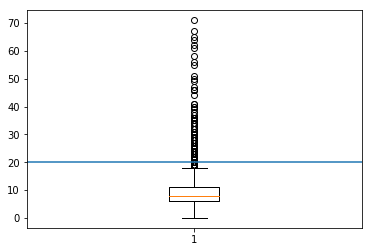

In [770]:
plt.boxplot(len_content)
plt.axhline(y = 20) # len>20 제거
plt.show()

In [771]:
len_content.describe()

count    5000.000000
mean        8.714400
std         5.890448
min         0.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        71.000000
Name: content, dtype: float64

#### 20문단이 넘는 기사 제거

In [772]:
## len>20 인 기사 확인
## 실제로 사설이 많다.
for doc in tc['content'][len_content>20]:
    print(doc)
    print("="*100)

['잉글랜드 프로축구 맨체스터 티가 평소와 달라졌다. 지난  개장한 토트넘홋스퍼 스타디움의 열성적인 위기를 의식해서였을까. 맨티의 점유율은 %에 그쳤다. 슛 도 횟수에서 회로, 토트넘의 회보다 적었다. ', ' 과르디올라답지 않았다 는 이야기가 들린다. 평소보다 전진을 자제하는 안정 지향적인 축구를 했다. 공간을 지배하는 점유율 중심의 축구를 구사하는 펩 과르디올라 감독의 철학과 반대된다. ', '맨티는  영국 런던 토트넘홋스퍼 스타디움에서 토트넘과 가진 - 유럽축구연맹 UEFA  챔피언스리그 강 차전에서 대 로 패했다. 과르디올라 감독 부임 이후 토트넘을 상대로 승 무 패의 호성적을 이어가던 맨티로서는 나리오에 없던 이변이었다. ', '결과뿐 아니라 경기 내용 면에서도 약간의 의문부호가 있었다. 평소처럼 강도 높은 전진 압박을 하지 않았다. 파비안 델프의 기용과 같은 선수단 조합의 문제도 그랬다. 과르디올라 감독의 사령탑 절 전체를 통틀어도 한 손가락에 꼽을 정도로 소극적인 경기 운영을 펼쳤다. 상당히 신중하게 경기에 임했다는 얘기다. ', '과르디올라의 달라진 축구 ', '과르디올라식 축구는 높은 지점에서부터 수비를 작한다. 선 공격수는 물론이고 최전방 스트라이커까지 상대 후방 빌드업을 방해하는데 가담하는 편이다. 높은 점유율을 바탕으로 한 역동적이고 빠른 수비, 빠른 전진 압박. 과르디올라 감독의 축구 철학으로 대표된다. 소유권을 잃는다면 미드필더 진영에서부터 곧바로 강력한 압박을 넣어 되찾아오려는 도를 펼친다. 전술의 완성도를 위해 체계적인 조직력과 넓은 야를 갖추기 위한 훈련을 반복한다. 그런 팀을 상대로 중원에서 공격 대 공격 맞불을 놓기란 쉽지 않다. ', '마우리오 포체티노 토트넘 감독도 이를 의식했다. 과르디올라 감독과의 대결에서 연패를 거두며 전술적 패배를 거듭하고 있던 상황에서 맨티의 수비적인 약점을 역습에서 찾고자 했다. 포체티노 감독 역 점유율을 중요하는 편이나 맨티를 상대로는 이를 포기했다. 라인을 좁게 유지하며 포백 수비의 지역방어 

In [773]:
# len>20 인 문단 제거, 229개 기사가 제거됐다.
# len>20 인 문서는 기사가 아닌 사설로 간주한다.
tc_2 = tc.drop(len_content[len_content>=20].index, axis = 0)
tc_2 = tc_2.drop(len_content[len_content==0].index, axis = 0)

tc_2.shape

(4778, 2)

## head 전처리

In [774]:
# 첫 문단의 길이 분포 확인
block_0 = tc_2['content'].apply(lambda content : content[0])

In [775]:
len_block_0 = block_0.apply(len)

In [776]:
len_block_0.describe()

count    4778.000000
mean      110.125576
std       164.398704
min         1.000000
25%        35.000000
50%        66.000000
75%       121.000000
max      1923.000000
Name: content, dtype: float64

In [777]:
(len_block_0.max()/100)*4

76.92

In [778]:
block_0[len_block_0.idxmin()]

'━'

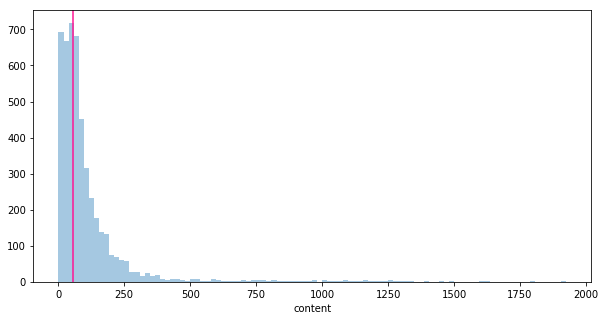

57.69


In [779]:
# 히스토그램 y가 뚝 떨어지는 지점을 summary의 최대 길이로 선택
# 4번째 블록에서 뚝 떨어진다.
# 78.1 ~= 80
plt.figure(figsize = (10,5))
n_bin = 100
sb.distplot(len_block_0, kde = False,bins = n_bin)
threshold = (len_block_0.max()/n_bin)*3
plt.axvline(x = threshold, color = 'deeppink')
plt.show()
print(threshold)

In [780]:
block_0[len_block_0<60]

0                                             내 챔스리그 강 차전
1                 미국 CNN이 아아 최고 스포츠스타 손흥민  토트넘 을 집중조명했다. 
2                 크루이프 후계자들  아약스가 크리스티아누 호날두 유벤투스 를 울렸다. 
6                            손흥민, 맨티와 챔스강 차전  아아선수 최다골 겨냥
9           손흥민  토트넘 과 크리스티아누 호날두  유벤투스 가 챔피언스리그 강에서 만날까?
10                      미세먼지와 쌀쌀했던 날씨도  축구 봄바람 을 막지 못했다. 
11      한국축구스타 손흥민  토트넘 이 강원도 산불 피해를 입은 강원도민에게 기부한 게 영...
13       지금은 챔피언스리그 강 차전이 가장 중요합니다. 경기를 즐겨야 하지만 반드 이겨야...
14                                    손흥민, 경기 막판 투입돼 어스트 
15                                         짜릿한 역전 우승이었다. 
21                                     이적 협조 않는 팀에 태업 의심 
22                최종 합계 언더파 우승   초대 챔피언은 손흥민의 첫홀과 같은 의미  
24            손흥민  토트넘 홋스퍼 FC 이 단  만에 도움을 기록하며 존재감을 과했다. 
25                    영국 언론이 손흥민  토트넘 의 아이스크림 광고까지 주목했다. 
27          이면 충했다. 후반 막판 교체출전한 손흥민  이 경기 연속 공격포인트를 올렸다. 
31         토트넘 홋스퍼의 마우리오 포체티노 감독이 손흥민을 올해의 선수상 후보로 평가했다. 
32      영국 프리미어리그에서 활약하는 손흥민이 강원 산불 피해 복구에 억만원을 기부한 사실...
34            

In [781]:
# check header
# 50자 이상인 문단이 처음 등장하면 반환한다.
def checkHead(doc):
    for block in doc:
        if(len(block)>=50) : return block

# check summary
# 30자 이하인 문단이 등장하면 반환한다.
def checkSummary(doc):
    summary = []
    for block in doc:
        if(len(block)<=30): summary.append(block)
    return ' '.join(summary)

In [782]:
tc_2['head'] = tc_2['content'].apply(checkHead)
tc_2['summary'] = tc_2['content'].apply(checkSummary)

In [783]:
null_list = tc_2['head'].isna()[tc_2['head'].isna()==True].index.tolist()

In [784]:
# 사진 기사, 테스트는 head가 없다.
tc_2.loc[null_list]

,title,content,head,summary
493,[주말에 뭘 볼까] 손흥민 오늘 아스널전 출격 외,"[[손흥민 오늘 아스널전 출격]토트넘-아스널 웸블리 스타디움 SPOTV , [...",None,
1006,화기애애한 훈련장,[손흥민 오른쪽 등 한국 대표선수들이 훈련을 하다 쉬는 간에 물장난을 치고 있다.],None,
1997,"손흥민, 10경기 침묵 깨고 '멀티골'…""오래 걸려 미안""","[ 돌아온 슛돌이 손흥민! 경기 만에 골 득점, 언론 평점 최고 ]",None,
2012,"""발렌시아 새 역사 썼다""…이강인, 韓선수 역대 최연소 유럽 1군 데뷔","[ 세 이강인, 손흥민 넘어 서다... 발렌아 군 데뷔 천억대 몸값]",None,
2163,"[경향포토] 손흥민, 승리한다",[손흥민이 서울드컵경기장에서 열린 우루과이와의 친선경기에서 공격하고 있다. ..],None,
2591,[경향포토] 모두가 즐거운 파울루 벤투호,[손흥민과 선수들이 경기도 파주NFC에서 열린 훈련에서 밝은 표정으로 얘기를 하고...,None,
2592,[경향포토] 김문환과 어깨동무한 손흥민,[손흥민이 경기도 파주NFC에서 열린 훈련에서 김문환과 어깨동무를 하고 있다.],None,
2593,"[경향포토] 손흥민, 금메달은 잊었다.",[손흥민이 경기도 파주NFC에서 훈련을 하고 있다.],None,손흥민이 경기도 파주NFC에서 훈련을 하고 있다.
2744,"손흥민 ""금메달은 국민의 것""",[[사진기사]],None,[사진기사]
3230,"[경향포토] 손흥민 ,,아시안게임과 인연이 없나?","[테스트, < @.>]",None,테스트 < @.>


In [785]:
tc_2.drop(null_list,axis =0,inplace = True)

In [786]:
tc_2['head']

0       마우리오 포체티노 사진  토트넘 홋스퍼 감독이 유럽축구연맹 UEFA 챔피언스리그 강...
1        CNN은  한국간   떠오른 한국 수퍼스타 손흥민 이란 제목으로 아아에서 가장 인...
2        네덜란드 프로축구 아약스는  이탈리아 알리안츠 스타디움에서 열린 유벤투스 이탈리아...
3       네덜란드 아약스가 크리스티아누 호날두가 속해 있는 이탈리아 유벤투스를 꺾고  만에 ...
4       지난  경기 광주의 한 경찰기숙학원. 오전  이 되자 걸그룹 트와이스의  예스 오어...
5       손흥민  토트넘 홋스퍼 사진 이  한국간  새벽 맨체스터 티 이하 맨티 를 상대로 ...
6        손세이셔널  손흥민  토트넘 이 맨체스터티 맨티 를 상대로 유럽축구연맹 UEFA ...
7       영광에 목마른 팀 토트넘 홋스퍼가 드디어 ∼ 유럽축구연맹 챔피언스리그 UCL  강으...
8       올 즌 초 해리 케인의 파트너 자리를 두고 싸웠던 경쟁자들은 이제는 동반자가 됐다....
9        ~ 유럽축구연맹 UEFA  챔피언스리그 강이  이하 한국각 과  가려진다. 강 차...
10       프로축구 K리그 관중이 눈에 띄게 늘었다.  끝난 라운드까지의 경기 평균 관중이 ...
11      한국축구스타 손흥민  토트넘 이 강원도 산불 피해를 입은 강원도민에게 기부한 게 영...
12      강원도 산불피해 이웃들을 돕기 위한 따뜻한 온정이 식지 않고 여전히 이어지고 있다....
13       지금은 챔피언스리그 강 차전이 가장 중요합니다. 경기를 즐겨야 하지만 반드 이겨야...
14      손흥민  토트넘 이  잉글랜드 프리미어리그 라운드 허더즈필드와의 홈경기에서 팀이 ―...
15       조정민  은 후반 한때 선두에게 타 차까지 뒤져 우승은 물 건너간 줄 알았다. 하...
16      손흥민  사진 이 도움을 기록한 잉글랜드 프리미어리그 EPL  토트넘이  영국 런던...
17       울산 울주

## head로 주제 분류

### 단어 추출

In [787]:
hn = Hannanum()

In [788]:
docs_sents = [] # [doc 0 :'....']
docs_words = [] # [doc 0 :['..'],...]

In [789]:
docs_sents = []
docs_words = []
for doc in tc_2['head']:
    sentences = nltk.sent_tokenize(doc)
    for sent in sentences:
        word_list = hn.nouns(sent)
        tmp_words = tmp_words+word_list
        tmp_str = ' '.join(tmp_words)
    docs_sents.append(tmp_str)
    docs_words.append(tmp_words)
    tmp_words=[]

In [790]:
docs_words

[['마우리오',
  '포체티노',
  '토트넘',
  '홋스퍼',
  '감독',
  '유럽축구연맹',
  '챔피언스리그',
  '강',
  '차전',
  '회견',
  '손흥민',
  '극찬',
  '포체티노',
  '감독',
  '차전',
  '하루',
  '오전',
  '한국간',
  '영국',
  '맨체스터',
  '에티하드',
  '스타디움',
  '회견',
  '즌',
  '손흥민',
  '환상적',
  '이',
  '지난해',
  '이후',
  '손흥민',
  '때문',
  '행복'],
 ['한국간', '한국', '수퍼스타', '손흥민', '이', '제목', '아아', '인기', '스포츠선수', '소개'],
 ['네덜란드',
  '프로축구',
  '아약스',
  '이탈리아',
  '알리안츠',
  '스타디움',
  '유벤투스',
  '이탈리아',
  '-즌',
  '유럽축구연맹',
  '챔피언스리그',
  '강',
  '차전',
  '역전승',
  '홈',
  '차전',
  '-',
  '아약스',
  '차전',
  '합계',
  '-',
  '강',
  '진출'],
 ['네덜란드',
  '아약스',
  '크리스티아누',
  '호날두',
  '이탈리아',
  '유벤투스',
  '만',
  '유럽축구연맹',
  '챔피언스리그',
  '강',
  '진출',
  '이변',
  '연출'],
 ['경기',
  '광주',
  '한',
  '경찰기숙학원',
  '오전',
  '걸그룹',
  '트와이스',
  '예스',
  '예스',
  '기숙사',
  '복',
  '전체',
  '중독성',
  '멜로디',
  '학원생',
  '몸',
  '신호',
  '뿐',
  '수험생들',
  '밤',
  '공부',
  '탓',
  '피곤',
  '며칠',
  '경찰',
  '공채',
  '필기험',
  '을',
  '생각',
  '침구',
  '정리',
  '세계',
  '위',
  '경제대국',
  '곱',
  '번',
  '클럽',
  '국민소득',
  '만달러',


### tf idf

In [835]:
obj_tfidf = tfidf(min_df = 0.01, max_df = 0.5) # 0.05 < df < 0.5
x = obj_tfidf.fit_transform(docs_sents )

In [836]:
obj_tfidf.get_feature_names()

['a매치',
 '가능성',
 '가운데',
 '감독',
 '감바',
 '강호',
 '개막',
 '결과',
 '결승',
 '결승골',
 '결승전',
 '경기',
 '경기력',
 '경기장',
 '경우',
 '경쟁',
 '골망',
 '골문',
 '골키퍼',
 '공개',
 '공격',
 '공격수',
 '공식',
 '관심',
 '교체',
 '구단',
 '구자철',
 '국가대표',
 '국가대표팀',
 '국내',
 '국제축구연맹',
 '그라운드',
 '금메달',
 '기간',
 '기록',
 '기성용',
 '기회',
 '김영권',
 '김학범',
 '남자',
 '남자축구',
 '논란',
 '눈물',
 '뉴캐슬',
 '다음',
 '달성',
 '대구',
 '대통령',
 '대표',
 '대표팀',
 '대한민국',
 '대한축구협회',
 '대회',
 '데뷔',
 '데뷔전',
 '데스리',
 '도르트문트',
 '도움',
 '도전',
 '독전',
 '동료',
 '동료들',
 '동안',
 '드컵',
 '득점',
 '때문',
 '라운드',
 '랭킹',
 '러아',
 '러아드컵',
 '런던',
 '로스토프',
 '리그',
 '리버풀',
 '마무리',
 '마우리오',
 '마음',
 '마지막',
 '만큼',
 '말레이아',
 '맨체스터',
 '멕코',
 '멕코전',
 '명단',
 '모습',
 '무대',
 '무패',
 '문제',
 '뮌헨',
 '미국',
 '미드필더',
 '바레인',
 '바이에른',
 '박지성',
 '반둥',
 '발렌아',
 '발탁',
 '발표',
 '베트남',
 '벤투호',
 '병역',
 '보고르',
 '보도',
 '복귀',
 '본선',
 '볼리비아',
 '부상',
 '부터',
 '브라질',
 '비난',
 '사람',
 '사진',
 '상대',
 '상트페테르부르크',
 '상황',
 '새벽',
 '생각',
 '서울',
 '서울드컵경기장',
 '선발',
 '선수들',
 '선정',
 '선제골',
 '성공',
 '성적',
 '세계',
 '소속',
 '소속팀',
 '소집',
 '손흥민',
 '수비'

In [837]:
high_sim_list = []

In [838]:
len(obj_tfidf.get_feature_names())

307

In [912]:
sim_mat = 1 - np.round(pairwise_distances(x, metric="cosine"),5)

In [913]:
np.fill_diagonal(sim_mat,-1) # 같은 문서는 유사도 -1로 처리

### 문서 번호는 다르지만 유사도가 1인 문서쌍

1668개

In [914]:
i_1,j_1 = np.where(sim_mat==1)

In [915]:
high_sim_1= list(zip(i_1,j_1,sim_mat[i_1,j_1]))

In [916]:
high_sim_1

[(38, 1332, 1.0),
 (43, 45, 1.0),
 (45, 43, 1.0),
 (83, 1894, 1.0),
 (129, 600, 1.0),
 (129, 1273, 1.0),
 (129, 2819, 1.0),
 (170, 1081, 1.0),
 (170, 1156, 1.0),
 (172, 585, 1.0),
 (255, 263, 1.0),
 (255, 264, 1.0),
 (258, 259, 1.0),
 (259, 258, 1.0),
 (263, 255, 1.0),
 (263, 264, 1.0),
 (264, 255, 1.0),
 (264, 263, 1.0),
 (323, 324, 1.0),
 (324, 323, 1.0),
 (326, 327, 1.0),
 (327, 326, 1.0),
 (333, 695, 1.0),
 (345, 1757, 1.0),
 (345, 3335, 1.0),
 (345, 3410, 1.0),
 (348, 3476, 1.0),
 (358, 1319, 1.0),
 (358, 3534, 1.0),
 (360, 1946, 1.0),
 (361, 362, 1.0),
 (362, 361, 1.0),
 (402, 403, 1.0),
 (403, 402, 1.0),
 (411, 1292, 1.0),
 (412, 458, 1.0),
 (448, 455, 1.0),
 (455, 448, 1.0),
 (458, 412, 1.0),
 (495, 1149, 1.0),
 (542, 545, 1.0),
 (542, 3957, 1.0),
 (545, 542, 1.0),
 (545, 3957, 1.0),
 (585, 172, 1.0),
 (600, 129, 1.0),
 (600, 1273, 1.0),
 (600, 2819, 1.0),
 (695, 333, 1.0),
 (759, 763, 1.0),
 (763, 759, 1.0),
 (771, 2178, 1.0),
 (771, 2194, 1.0),
 (780, 1675, 1.0),
 (800, 804, 

In [917]:
len(high_sim_1)

928

In [871]:
tc_2['head'][2072]

'축구대표팀이  천안종합운동장에서 열린 파나마와의 평가전에서 -로 비겼다. 대표팀은 전반  박주호 울산 현대 , 전반  황인범 대전 티즌 의 득점으로 -으로 앞섰고 전반 과 후반  실점했다. 대표팀은 지난  파울루 벤투 감독이 지휘봉을 잡은 뒤 승 무, 무패 행진을 이어갔다.'

In [872]:
tc_2['head'][2071]

'벤투호가 올해 국내에서 열린 마지막 A매치에서 공 수의 불균형을 드러내며 아쉽게 비겼다. '

In [873]:
tfidf_array = x.toarray()

In [875]:
tfidf_array[2072]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [876]:
tfidf_array[2071]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

* 유사도 = 1 인 문서쌍 100개 검토 결과
    * 성능이 안좋다.
    * 기사마다 쓰는 용어가 조금씩 달라서, tfidf를 적용하면 sparse matrix가 생성된다.
        * 유의어 처리 필요 => word2vec 
* 처리속도 numpy array > pandas.apply >> for
 

## 본문으로 주제 분류

### 본문 추출

In [889]:
contents = df_news['content']

### 본문 전처리 \n 포함

In [893]:
reg_reporter = re.compile('[가-힣]+\s[가-힣]*기자') # 기자
reg_email = re.compile('[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$') # 이메일
reg_eng = re.compile('[a-z]+') # 소문자 알파벳, 이메일 제거용, 대문자는 남겨둔다
reg_chi = re.compile("[\u4e00-\u9fff]+") # 한자
reg_sc = re.compile("·|ㆍ|ㆍ|…|◆+|◇+|▶+|●+|▲+|“|”|‘|’|\"|\'|\(|\)|\n+|\-|\∼") # 특수문자 \n 포함
reg_date = re.compile('\d*일|\d*월|\d*년|\d*시|\d*분|\(현지시간\)|\(현지시각\)|\d+') # 날짜,시간,숫자

In [894]:
def preProcessing2(doc):
    tmp = re.sub(reg_reporter, '', doc)
    tmp = re.sub(reg_email, '', tmp)
    tmp = re.sub(reg_eng, '', tmp)
    tmp = re.sub(reg_chi, '', tmp)
    tmp = re.sub(reg_sc, ' ', tmp)
    tmp = re.sub(reg_date, '', tmp)
    return tmp

In [895]:
contents_pp = contents.apply(preProcessing2)

In [897]:
contents_pp[:10]

0    내 챔스리그 강 차전 맨티 잡으면 강 확정  손을 믿는다.  마우리오 포체티노 사진...
1    미국 CNN이 아아 최고 스포츠스타 손흥민  토트넘 을 집중조명했다.     CNN...
2     크루이프 후계자들  아약스가 크리스티아누 호날두 유벤투스 를 울렸다.     네덜...
3    네덜란드 아약스가 크리스티아누 호날두가 속해 있는 이탈리아 유벤투스를 꺾고  만에 ...
4    지난  경기 광주의 한 경찰기숙학원. 오전  이 되자 걸그룹 트와이스의  예스 오어...
5    손흥민  토트넘 홋스퍼 사진 이  한국간  새벽 맨체스터 티 이하 맨티 를 상대로 ...
6    손흥민, 맨티와 챔스강 차전  아아선수 최다골 겨냥  손세이셔널  손흥민  토트넘 ...
7    영광에 목마른 팀 토트넘 홋스퍼가 드디어 ∼ 유럽축구연맹 챔피언스리그 UCL  강으...
8    올 즌 초 해리 케인의 파트너 자리를 두고 싸웠던 경쟁자들은 이제는 동반자가 됐다....
9    손흥민  토트넘 과 크리스티아누 호날두  유벤투스 가 챔피언스리그 강에서 만날까? ...
Name: content, dtype: object

### 단어 추출

In [898]:
docs_sents_contents = [] # [doc 0 :'....']
docs_words_contents = [] # [doc 0 :['..'],...]

In [899]:
for doc in contents_pp:
    sentences = nltk.sent_tokenize(doc)
    for sent in sentences:
        word_list = hn.nouns(sent)
        tmp_words = tmp_words+word_list
        tmp_str = ' '.join(tmp_words)
    docs_sents_contents.append(tmp_str)
    docs_words_contents.append(tmp_words)
    tmp_words=[]

### tf idf

In [970]:
content_tfidf = tfidf(min_df = 0.1, max_df = 0.8) # 0.05 < df < 0.5
x_content= content_tfidf.fit_transform(docs_sents_contents)

In [971]:
content_tfidf.get_feature_names()

['a매치',
 '가능성',
 '가운데',
 '감독',
 '감바',
 '결과',
 '결승골',
 '경기',
 '경기력',
 '경기장',
 '경우',
 '골문',
 '골키퍼',
 '공격',
 '공격수',
 '관심',
 '교체',
 '국제축구연맹',
 '그라운드',
 '금메달',
 '기록',
 '기성용',
 '기회',
 '김영권',
 '김학범',
 '뉴캐슬',
 '다음',
 '대표팀',
 '대회',
 '도움',
 '동안',
 '드컵',
 '득점',
 '때문',
 '라운드',
 '랭킹',
 '러아',
 '러아드컵',
 '런던',
 '리그',
 '마지막',
 '만큼',
 '맨체스터',
 '멕코',
 '모습',
 '무대',
 '문제',
 '미드필더',
 '부상',
 '부터',
 '상대',
 '상황',
 '생각',
 '선발',
 '선수들',
 '선제골',
 '설명',
 '세계',
 '소속팀',
 '수비',
 '수비수',
 '슈팅',
 '스웨덴',
 '스타',
 '스타디움',
 '승리',
 '승점',
 '신태용',
 '아랍에미리트',
 '아안게',
 '아안컵',
 '에이스',
 '역할',
 '연결',
 '연속',
 '영국',
 '예상',
 '오사카',
 '오후',
 '왼쪽',
 '우리',
 '우승',
 '유나이티드',
 '유럽',
 '이날',
 '이름',
 '이번',
 '이상',
 '이승우',
 '이유',
 '이재성',
 '이하',
 '이후',
 '인도네아',
 '인터뷰',
 '잉글랜드',
 '자리',
 '자신',
 '자카르타',
 '전력',
 '전반',
 '전술',
 '정도',
 '정우영',
 '조별리그',
 '조현우',
 '주장',
 '준비',
 '중앙',
 '중요',
 '지난달',
 '지난해',
 '진출',
 '차례',
 '차전',
 '챔피언스리그',
 '처음',
 '초반',
 '최고',
 '최전방',
 '축구',
 '축구대표팀',
 '출전',
 '측면',
 '케인',
 '탈락',
 '토트넘',
 '투입',
 '파울루',
 '팔렘방',
 '패배',
 '패스',
 '페

In [972]:
len(content_tfidf.get_feature_names())

150

In [974]:
x_content_array = x_content.toarray()

In [947]:
sim_mat_content = 1 - np.round(pairwise_distances(x_content, metric="cosine"),5)
np.fill_diagonal(sim_mat_content,-1) # 같은 문서는 유사도 -1로 처리

### 문서 번호는 다르지만 유사도가 1인 문서쌍

In [948]:
i_1,j_1 = np.where(sim_mat==1)
high_sim_2 = list(zip(i_1,j_1,sim_mat[i_1,j_1]))

In [950]:
high_sim_2

[(38, 1332, 1.0),
 (43, 45, 1.0),
 (45, 43, 1.0),
 (83, 1894, 1.0),
 (129, 600, 1.0),
 (129, 1273, 1.0),
 (129, 2819, 1.0),
 (170, 1081, 1.0),
 (170, 1156, 1.0),
 (172, 585, 1.0),
 (255, 263, 1.0),
 (255, 264, 1.0),
 (258, 259, 1.0),
 (259, 258, 1.0),
 (263, 255, 1.0),
 (263, 264, 1.0),
 (264, 255, 1.0),
 (264, 263, 1.0),
 (323, 324, 1.0),
 (324, 323, 1.0),
 (326, 327, 1.0),
 (327, 326, 1.0),
 (333, 695, 1.0),
 (345, 1757, 1.0),
 (345, 3335, 1.0),
 (345, 3410, 1.0),
 (348, 3476, 1.0),
 (358, 1319, 1.0),
 (358, 3534, 1.0),
 (360, 1946, 1.0),
 (361, 362, 1.0),
 (362, 361, 1.0),
 (402, 403, 1.0),
 (403, 402, 1.0),
 (411, 1292, 1.0),
 (412, 458, 1.0),
 (448, 455, 1.0),
 (455, 448, 1.0),
 (458, 412, 1.0),
 (495, 1149, 1.0),
 (542, 545, 1.0),
 (542, 3957, 1.0),
 (545, 542, 1.0),
 (545, 3957, 1.0),
 (585, 172, 1.0),
 (600, 129, 1.0),
 (600, 1273, 1.0),
 (600, 2819, 1.0),
 (695, 333, 1.0),
 (759, 763, 1.0),
 (763, 759, 1.0),
 (771, 2178, 1.0),
 (771, 2194, 1.0),
 (780, 1675, 1.0),
 (800, 804, 

In [953]:
len(high_sim_2)

928

In [966]:
print(content[4283])

한국이 2018 러시아월드컵 조별리그 탈락의 사선에서 기사회생했다. 독일이 경기 종료를 앞두고 스웨덴에 극적으로 역전승하면서다. 한국의 16강 진출 가능성은 여전히 희박하다. 하지만 실낱같은 희망을 안고 조별리그 3차전에 임할 수 있게 됐다. 
 
한국은 24일 오전 0시(이하 한국시간) 러시아 로스토프 아레나에서 열린 월드컵 조별리그 F조 2차전에서 멕시코에 1대 2로 석패했다. 전반 26분 카를로스 벨라에게 선제골, 후반 21분 하비에르 에르난데스(치차리토)에게 결승골을 허용해 0-2로 벌어진 후반 추가시간 3분 손흥민의 만회골로 겨우 영패를 면했다. 
 
한국의 운명은 오전 3시 소치 피시트 스타디움에서 이어진 F조 다른 2차전으로 넘어갔다. 이 경기에서 독일이 스웨덴에 이겨야 한국은 16강 진출의 희망을 이어갈 수 있었다. 스웨덴이 이기거나 비기면 한국은 조별리그 탈락을 확정할 운명이었다. 
 
독일은 이 경기에서 전반 32분 스웨덴 공격수 올라 토이보넨에게 선제골을 얻어맞은 뒤 좀처럼 주도권을 잡지 못하고 전전긍긍했다. 독일 역시 패배하면 한국과 마찬가지로 탈락이 확정됐다. 
 
하지만 후반 3분 공격수 마르코 로이스의 동점골에 이어 후반 추가시간 5분 공격수 토니 크로스의 역전 결승골로 승부를 뒤집었다. 심판이 부여한 추가시간은 5분. 크로스는 종료를 10여초 앞두고 스웨덴 페널티박스 왼쪽에서 얻은 프리킥 기회 때 좁은 각도를 뚫고 골문 안으로 공을 때려 넣었다. 
 
 
 
F조에서는 어느 나라도 16강 진출, 또는 조별리그 탈락을 확정하지 않았다. 멕시코는 2승(승점 6‧골득실 +2)으로 1위, 한국은 2패(승점 0‧골득실 -2)로 4위다. 독일은 스웨덴과 전적(1승1패‧승점 3)과 득실점(2득점 2실점‧골득실 0)에서 모두 같아졌지만 상대 전적에서 앞서 2위가 됐다. 스웨덴은 3위다. 
 
한국은 비록 조기 탈락을 면했지만 스스로의 운명을 결정할 수는 없다. 16강 진출을 위해서는 기적에 가까운 상황이 벌어져야 한다. 한국은 오는 27일 밤 1

In [965]:
print(content[4292])

  
 
 23일 오후(현지시간) 러시아 로스토프나노두 로스토프아레나에서 열린 2018 러시아 월드컵 F조 조별리그 2차전 대한민국과 멕시코의 경기에서 대한민국의 손흥민이 패배 후 아쉬워 하고 있다. 
 
 사진(뉴시스AP)=로스토프


### tfidf vector 의 문서 한개당 0의 비율 확인

In [977]:
x_content_array.shape

(5000, 150)

In [1012]:
zero_ratio = []

In [1013]:
for i in range(5000):
    zero_ratio.append((150-np.count_nonzero(x_content_array[i]))/150)

In [1014]:
zero_ratio = pd.Series(zero_ratio)

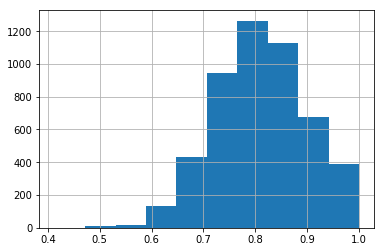

In [1015]:
zero_ratio.hist()
plt.show()

### 유사도가 1이지만 내용이 다른 문서의 tfidf vector 값 확인

In [1016]:
high_sim_2

[(38, 1332, 1.0),
 (43, 45, 1.0),
 (45, 43, 1.0),
 (83, 1894, 1.0),
 (129, 600, 1.0),
 (129, 1273, 1.0),
 (129, 2819, 1.0),
 (170, 1081, 1.0),
 (170, 1156, 1.0),
 (172, 585, 1.0),
 (255, 263, 1.0),
 (255, 264, 1.0),
 (258, 259, 1.0),
 (259, 258, 1.0),
 (263, 255, 1.0),
 (263, 264, 1.0),
 (264, 255, 1.0),
 (264, 263, 1.0),
 (323, 324, 1.0),
 (324, 323, 1.0),
 (326, 327, 1.0),
 (327, 326, 1.0),
 (333, 695, 1.0),
 (345, 1757, 1.0),
 (345, 3335, 1.0),
 (345, 3410, 1.0),
 (348, 3476, 1.0),
 (358, 1319, 1.0),
 (358, 3534, 1.0),
 (360, 1946, 1.0),
 (361, 362, 1.0),
 (362, 361, 1.0),
 (402, 403, 1.0),
 (403, 402, 1.0),
 (411, 1292, 1.0),
 (412, 458, 1.0),
 (448, 455, 1.0),
 (455, 448, 1.0),
 (458, 412, 1.0),
 (495, 1149, 1.0),
 (542, 545, 1.0),
 (542, 3957, 1.0),
 (545, 542, 1.0),
 (545, 3957, 1.0),
 (585, 172, 1.0),
 (600, 129, 1.0),
 (600, 1273, 1.0),
 (600, 2819, 1.0),
 (695, 333, 1.0),
 (759, 763, 1.0),
 (763, 759, 1.0),
 (771, 2178, 1.0),
 (771, 2194, 1.0),
 (780, 1675, 1.0),
 (800, 804, 

In [1018]:
# 손흥민이 올 시즌 프리미어 리그에서 첫 어시스트를 올림
print(contents[1968])

잉글랜드 프로축구 토트넘 공격수 손흥민(26·토트넘)이 올 시즌 프리미어리그에서 첫 어시스트를 올렸다. 하지만 교체투입 후 다시 교체아웃되는 이례적인 일을 겪었다. 
 
 손흥민은 4일(한국시간) 영국 울버햄프턴의 몰리뉴 스타디움에서 열린 울버햄프턴과의 2018-2019 잉글리시 프리미어리그 11라운드를 교체명단으로 시작했다. 하지만 킥오프 2분 만에 토트넘의 2선 공격수 무사 뎀벨레가 다쳤다. 마우리시오 포체티노(아르헨티나) 토트넘 감독은 전반 6분 만에 손흥민을 긴급투입했다. 
 
 왼쪽 공격수로 나선 손흥민은 전반 27분 에릭 라멜라의 선제골을 도왔다. 손흥민이 페널티 지역 오른쪽에서 라멜라에게 리턴패스를 내줬다. 라멜라가 선제골로 연결했다. 손흥민은 올 시즌 2호도움이자 프리미어리그 첫 도움을 올렸다. 
 
 손흥민은 전반 30분에는 추가골의 출발점 역할도 해냈다. 손흥민이 아크 서클에서 트리피어에게 패스를 찔러줬다. 트리피어의 크로스를 모우라가 헤딩골로 연결했다. 손흥민은 지난 1일 웨스트햄과 리그컵 16강에서 2골을 몰아친 데 이어 2경기 연속 맹활약했다. 
 
 포체티노 감독은 후반 13분 손흥민을 빼고 크리스티안 에릭센을 투입했다. 축구에서 교체투입된 선수가 같은경기에서 교체아웃되는건 이례적인 일이다. 보통 축구에서 굴욕적인 일로 여겨진다. 
 
 토트넘은 후반 16분 케인이 한골을 더 보태 3-0으로 앞서갔다. 하지만 손흥민이 빠진 토트넘은 후반 23분과 후반 34분에 네베스, 히메네스에게 연속실점했다. 토트넘은 3-2 진땀승을 거두며 4위를 기록했다. 
 
 포체티노 감독은 경기 후 공식 기자회견에서 “지난 1일 풀타임을 소화한 손흥민 대신 체력적으로 부담없는 선수를 투입한 것일 뿐이다. 상식적인 결정”이라고 설명했다. 3일 전 풀타임을 뛴 손흥민의 체력안배를 위해 교체아웃시켰다는 의미다. 토트넘은 7일 에인트호번(네덜란드)와 유럽 챔피언스리그 경기를 앞두고 있다. 
 
 하지만 손흥민은 경기 후 믹스트존(공동취재구역) 인터뷰를 정중하게 거절

In [1019]:
# 한국이 우루과이 이김
print(contents[2154])

한국 축구가 남미 강호 우루과이를 7전 8기 끝에 꺾었다. 우리 축구 대표팀이 우루과이를 이긴 것은 36년 만에 처음이다.
파울루 벤투 감독이 이끄는 축구대표팀은 12일 서울월드컵경기장에서 열린 평가전에서 황의조(감바 오사카)의 선제골과 정우영(알사드)의 결승골을 앞세워 한 골 만회에 그친 우루과이를 2-1로 물리쳤다.
이로써 벤투호는 지난달 코스타리카전 2-0 승리와 칠레전 0-0 무승부에 이어 출범 후 A매치(국가대표팀간 경기) 3경기 연속 무패(2승 1무) 행진을 이어갔다.
앞서 역대 A매치 상대전적에서 우루과이를 1무 6패로 한 번도 이기지 못한 한국은 1982년 2월 20일 네루컵 2-2 무승부 이후 처음으로 승리를 따냈다.
벤투 감독은 원톱에 황의조를 세우고 좌우 날개로 손흥민(토트넘)과 황희찬(함부르크)을 배치해 우루과이 공략에 나섰다.
남태희(알두하일)가 공격형 미드필더, 기성용(뉴캐슬)과 정우영이 수비형 미드필더 2명이 서는 ‘더블 볼란테’로 나섰고, 포백 수비라인에는 왼쪽부터 홍철(수원)-김영권(광저우)-장현수(FC도쿄)-이용(전북)이 늘어섰다. 골문은 김승규(빗셀 고베)가 지켰다.우루과이는 투톱에 에딘손 카바니(파리 생제르맹)와 크리스티안 스투아니(지로나)를 내세워 맞불을 놨다. 2018 러시아 월드컵 프랑스와 8강 때 선발 라인업 중 평가전에 오지 못한 루이스 수아레스(FC바르셀로나)와 호세 히메네스(아틀레티코 마드리드)를 뺀 9명을 베스트 멤버로 가동했다.
국제축구연맹(FIFA) 5위의 강호 우루과이가 경기를 압도할 것이라는 예상가 달리는 한국이 경기 초반부터 강한 공세로 공격 주도권을 잡았다.
전반 볼 점유율이 74대 26의 압도적 우위를 점했지만 결정적인 득점 기회로 연결하지 못한 게 못내 아쉬웠다.
후반 들어서도 6만5천여석의 스탠드를 붉은물결로 채운 홈팬들의 응원 속에 태극전사의 공세가 수그러들지 않았다.
자카르타·팔렘방 아시안게임 9골로 득점왕에 올랐던 황의조가 해결사로 나섰다.
한국은 후반 21분 손흥민, 남태희의 패스에 이어

In [1024]:
# 1968, 2154
x_1968 = x_content_array[1968]
x_2154 = x_content_array[2154]
features = content_tfidf.get_feature_names()

In [1041]:
# tf idf 가 0 이 아닌 feature 추출
not_zero_1968 = np.where(x_1968!=0)[0].tolist()
not_zero_2154 = np.where(x_2154!=0)[0].tolist()

In [1049]:
for i in not_zero_1968:
    print(features[i])

감독
경기
경기장
공격수
기록
도움
라운드
선제골
설명
스타디움
역할
연결
연속
영국
왼쪽
유럽
인터뷰
잉글랜드
전반
챔피언스리그
축구
케인
토트넘
투입
패스
프리미어리그
한국간
후반


In [1050]:
for i in not_zero_2154:
    print(features[i])

a매치
감독
감바
결승골
경기
골문
골키퍼
공격
국제축구연맹
기성용
기회
김영권
뉴캐슬
대표팀
드컵
득점
미드필더
상황
선발
선제골
슈팅
승리
아안게
연결
연속
예상
오사카
왼쪽
우리
이후
자카르타
전반
정우영
지난달
처음
초반
축구
축구대표팀
토트넘
파울루
팔렘방
패스
페널티킥
평가전
한국
황의조
황희찬
후반


In [1039]:
not_zero_2154[0][1]

3

1968 번 문서에서 키워드 '어시스트'가 빠졌다. 2154 문서에서는 '우루과이'가 빠졌다. tfidf 벡터화 과정에서 min_df의 최솟값을 적용하면서 위와같이 누락됐다고 판단된다.
일반적으로 '주제'를 판단할 때는 '키워드'를 기준으로 한다.희소가치가 높은(idf 가 높은) 단어는 주제를 판단할 때 중요하게 작용할 것이다. min_df 최솟값을 설정하지 않고 모델링해본다.

일반적으로 기사는 동어반복을 피한다. 주제문을 작성할 때는 주제를 최대한 압축하는 키워드를 선정한다.

### df max 를 설정하지 않고 벡터화

In [1094]:
content_tfidf = tfidf()
x_content= content_tfidf.fit_transform(docs_sents_contents)
x_content_array = x_content.toarray()

In [1095]:
len(content_tfidf.get_feature_names())

36650

In [1111]:
x_content_array = x_content.toarray()
sim_mat_content = 1 - np.round(pairwise_distances(x_content, metric="cosine"),5)
np.fill_diagonal(sim_mat_content,-1) # 같은 문서는 유사도 -1로 처리

In [1113]:
i_1,j_1 = np.where(sim_mat_content==1)
high_sim_3 = list(zip(i_1,j_1,sim_mat_content[i_1,j_1]))

In [1114]:
high_sim_3

[(264, 265, 1.0),
 (265, 264, 1.0),
 (269, 270, 1.0),
 (270, 269, 1.0),
 (330, 331, 1.0),
 (331, 330, 1.0),
 (333, 334, 1.0),
 (334, 333, 1.0),
 (423, 470, 1.0),
 (470, 423, 1.0),
 (1973, 1986, 1.0),
 (1986, 1973, 1.0),
 (2165, 2166, 1.0),
 (2166, 2165, 1.0),
 (2186, 2187, 1.0),
 (2187, 2186, 1.0),
 (2387, 2388, 1.0),
 (2388, 2387, 1.0),
 (2401, 2402, 1.0),
 (2402, 2401, 1.0),
 (2479, 2480, 1.0),
 (2480, 2479, 1.0),
 (2532, 2535, 1.0),
 (2535, 2532, 1.0),
 (2569, 2577, 1.0),
 (2569, 2578, 1.0),
 (2569, 2579, 1.0),
 (2577, 2569, 1.0),
 (2577, 2578, 1.0),
 (2577, 2579, 1.0),
 (2578, 2569, 1.0),
 (2578, 2577, 1.0),
 (2578, 2579, 1.0),
 (2579, 2569, 1.0),
 (2579, 2577, 1.0),
 (2579, 2578, 1.0),
 (2681, 2683, 1.0),
 (2683, 2681, 1.0),
 (2696, 2702, 1.0),
 (2697, 2703, 1.0),
 (2702, 2696, 1.0),
 (2703, 2697, 1.0),
 (2744, 3744, 1.0),
 (2744, 4170, 1.0),
 (2744, 4568, 1.0),
 (2771, 2774, 1.0),
 (2771, 2776, 1.0),
 (2772, 2773, 1.0),
 (2773, 2772, 1.0),
 (2774, 2771, 1.0),
 (2774, 2776, 1.0),


In [1115]:
len(high_sim_3)

488

In [1120]:
sim_mat_content[1968][2154]

1.0

min_df를 설정하지 않으면 유사도가 1에서 0.077로 감소한다.

(3889, 3893, 1.0)

In [1123]:
print(contents[3389])

고교 3학년 때인 2014년 K리그 주니어(유소년팀 리그)에서 팀을 우승으로 이끌며 득점왕과 MVP 2관왕에 올랐다. 2008년 시작한 K리그 주니어에서 단일 대회 2관왕을 기록한 건 나상호가 유일하다. 2014년 백록기 대회에서도 득점왕에 오르며 팀에 우승 트로피를 선물했다. 그를 키운 광주FC 외에도 여러 팀에서 탐낼 만한 재목으로 성장했다.하지만 나상호는 고교 졸업 후 프로 대신 단국대 진학을 결정했다. 성인 무대에 연착륙하기 위해 약점부터 보완하기로 했다. 그는 대학 무대를 거치며 체격을 키우고 몸싸움을 익혔다. 많은 경기에 출전하며 꾸준히 경기 감각을 유지했다.차분히 준비를 마친 그는 2017년 광주FC에 입단했고, 그해 8월 최강팀 전북 현대를 상대로 프로 데뷔 골을 신고했다. 올해는 물 만난 고기처럼 2부 리그 무대를 휩쓸고 있다.나상호가 대표팀 유니폼을 입고 메이저 대회에 나서는 건 이번이 처음이다. 그동안 연령별 월드컵 대회엔 나서지 못했다. 그는 "설레기도 하고 긴장도 된다"며 "정신적으로 잘 무장하겠다"고 말했다.나상호가 제 역할을 해준다면 한국 공격진에도 숨통이 트인다. 김학범 감독은 "손흥민은 철인이 아니다. 합류 후에도 무리해서 투입하지 않을 것"이라며 "베스트 11이 없는 만큼 (나상호 등) 모든 선수가 많은 시간을 뛰어줘야 한다"고 주문했다. 나상호는 "1차전 바레인전을 하는 날(12일)이 내 생일"이라며 "경기에 나갈 확률이 커진 만큼 제대로 준비해 최상의 시나리오를 써보겠다"고 말했다.


In [1124]:
print(contents[3893])

축구선수 손흥민(등번호 7번)이 27일(현지시간) 러시아 카잔 아레나에서 열린 2018 러시아월드컵 조별리그 F조 3차전 독일과의 경기에서 1-0으로 앞서던 후반 추가시간에 두번째 골을 넣고 신태용 감독(왼쪽)과 손을 들며 함께 기뻐하고 있다. 
 
뉴시스


In [1101]:
# 345, 3140
not_zero_x_345 = np.where(x_content_array[345]!=0)[0].tolist()
not_zero_x_3140 = np.where(x_content_array[3410]!=0)[0].tolist()

In [1102]:
features = content_tfidf.get_feature_names()

In [1103]:
for i in not_zero_x_345:
    print(features[i])

a매치
가능
가능성
가세한
감독
감바
강조
것이냐
결정
경기
경우
고민
공격
공격수
공격형
관심
관전
관전포인트
교체투입
국제축구연맹
권창훈
그동안
극대화키
긍정적
기대
기용
기회
녹아드는지
능력
대표팀
데뷔전
디종
때문
랭킹
만큼
명단
문수경기장
미드필더
발렌아
발전
발탁
방안
백승호
벤투호
변화
볼리비아
상황
선발
손흥민
순위
슛돌
스타
승패
아랍에미리트
아아축구연맹
아안컵에서
애용
여기
여부
여의치
예선
오사카
요인
우리
울산
원칙
원톱
융화
이강
이강인
이동
이번
이상
이전
이후
자신
저녁
전날
전반적
중앙공격형
중요
지난해
진행
최전방
축구대표팀
출범
출전
측면
카타르드컵
탈락
토트넘
투톱
평가전
포메이션
포인트
포지션
포함
플레이
하나
한국
한국의
홋스퍼
확인
활약
활용
활용법
황의조
회견


In [1104]:
for i in not_zero_x_3140:
    print(features[i])

가능성
가세해
감독
감바
강점
강행
강행군
강호
강호들
개막
개최국
거두느냐
거론
결과
결과적
결국
결선
결승전
결장하거나
결정
경기
경기력
경우
경쟁국들
경쟁력
고전
공개
공격
공격수
공격진
공산
과정
과정들
과제
국가대표
극복
근심
금메달
기간
기대하긴
기온
김학범
김학범호
나라
나리오
남자축구
남자축구대표팀
남짓
네티즌들
논란
눈길
다양
다음달
답답
대표팀
대한축구협회
도전
도착
동안
레벨
마주
만큼
말레이
맞대결
맹활약
목표
문제
바레
바레인
발표
방법
베트남
부담
부족한
북한
불투명
비롯
비판
사실
사우디아라비아
사흘
상대
상대하긴
상상하긴
석현준
선발
선수
선수들
선택
설득력
섭씨
성적
소집
손흥민
수모
숙명
순서
스무
습도
승리
승부
아랍에미리트
아아
아안게
안팎
엔트리
여론
여부
여정
역대
역풍
연패
예상
예정
오사카
와드카드
완성
우려
우리
우리나라
우승
유럽파
의도적
의미
이상
이승우
이틀
이후
익숙
인도네아
인방
임기응변
입증
자부
자연
자체
자카르타
잘못
잘츠부르크
장담
적응
적절
전략적
전력
전반적
전술
절차
정도
정때문
제때
조별리그
조별리그에서
중동
중요
즐비
증명
직전
직후
진출
채워넣어야
초반
최강
최고
최상
최선
최악
축구
축구팬들
침대축구
카드
키르기스스탄
토너먼트
토트넘
통과
트루아
티켓
팀워크
팔렘방
평가
필요
한국
합류
해명
해외파
헬라스베로
현재
현지
호랑
확실
환경
황당
황의조
황의조냐
황희찬
후보


In [1106]:
x_content_array[345]

array([0., 0., 0., ..., 0., 0., 0.])

In [1090]:
from scipy import spatial


In [1110]:
# 345, 3140
1-spatial.distance.cosine(x_content_array[38],x_content_array[1332])

0.17370982229337661